In [1]:
import zipfile
import pandas as pd

# Define the path to the zip file and the CSV file inside it
zip_path = '../data_comp.zip'
csv_filename = 'consumer_complaints.csv'

# Open the zip file and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Displaying the first few raws of the dataframe
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [2]:
# Displaying basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [3]:
# Dropping the unnecessary 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Dropping rows with missing values in the 'narrative' column
df = df.dropna(subset=['narrative'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [4]:
# Checking for duplicate rows based on 'product' and 'narrative' columns
duplicates = df.duplicated(subset=['product', 'narrative']).sum()

duplicates

37735

In [5]:
# Removing duplicate entries based on 'product' and 'narrative' columns
df = df.drop_duplicates(subset=['product', 'narrative'])

# Verifying the new shape of the dataset
df.shape

(124676, 2)

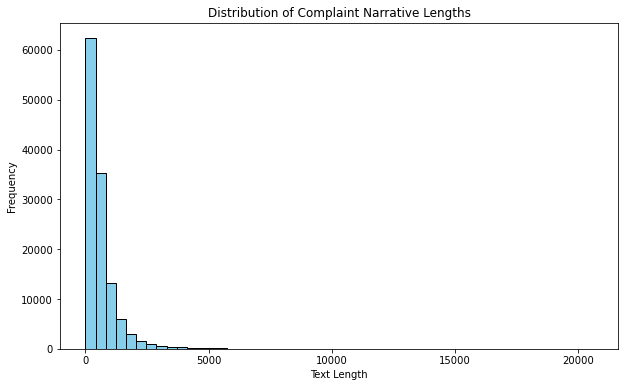

count    124676.000000
mean        633.359484
std         832.511639
min           3.000000
25%         219.000000
50%         414.000000
75%         752.000000
max       20596.000000
Name: text_length, dtype: float64

In [6]:
import matplotlib.pyplot as plt

# Calculating the length of each complaint narrative
df['text_length'] = df['narrative'].apply(len)

# Summary statistics for text length
text_length_summary = df['text_length'].describe()

# Plotting the distribution of text length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

text_length_summary

In [ ]:
# Removing rows where the text length is below 10 characters
df = df[df['text_length'] >= 10]

# Checking the new shape of the dataset and recalculating summary statistics for text length
new_shape = df.shape
text_length_summary_updated = df['text_length'].describe()

new_shape, text_length_summary_updated

((124633, 3),
 count    124633.00000
 mean        633.57557
 std         832.57394
 min          10.00000
 25%         219.00000
 50%         414.00000
 75%         752.00000
 max       20596.00000
 Name: text_length, dtype: float64)

In [8]:
# Checking the distribution of the 'product' categories
product_distribution = df['product'].value_counts()

product_distribution

credit_reporting       56283
debt_collection        21106
mortgages_and_loans    18758
credit_card            15023
retail_banking         13463
Name: product, dtype: int64

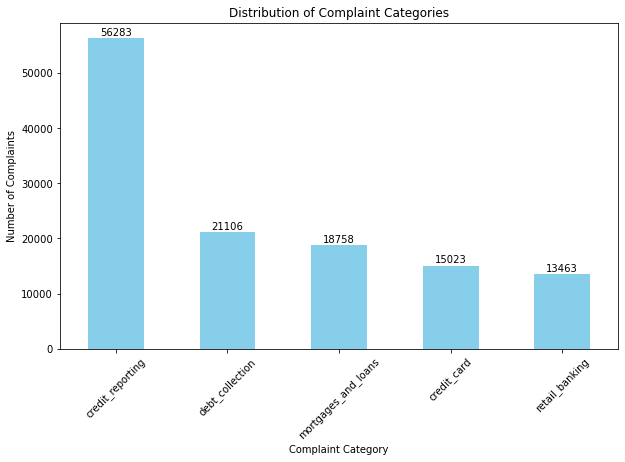

In [9]:
import matplotlib.pyplot as plt

# Plotting the distribution of complaint categories with complaint counts on top of each bar
plt.figure(figsize=(10, 6))
ax = product_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)

# Adding text labels on top of each bar
for i, count in enumerate(product_distribution):
    ax.text(i, count + 200, str(count), ha='center', va='bottom')

plt.show()

### Text Preprocesssing

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Ensure that NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initializing stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Defining the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a single string with whitespace handling
    cleaned_text = ' '.join(words).strip()  # Remove leading/trailing whitespace
    return ' '.join(cleaned_text.split())    # Replace multiple spaces with a single space

# Applying preprocessing to the 'narrative' column
df['cleaned_narrative'] = df['narrative'].apply(preprocess_text)

# Displaying a sample of the cleaned narratives
df[['narrative', 'cleaned_narrative']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,narrative,cleaned_narrative
0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...,payment history missing credit report speciali...
4,payment history missing credit report made mis...,payment history missing credit report made mis...


Word Count Summary:
 count    124633.000000
mean         87.124116
std         110.856002
min           1.000000
25%          30.000000
50%          58.000000
75%         104.000000
max        2684.000000
Name: word_count, dtype: float64


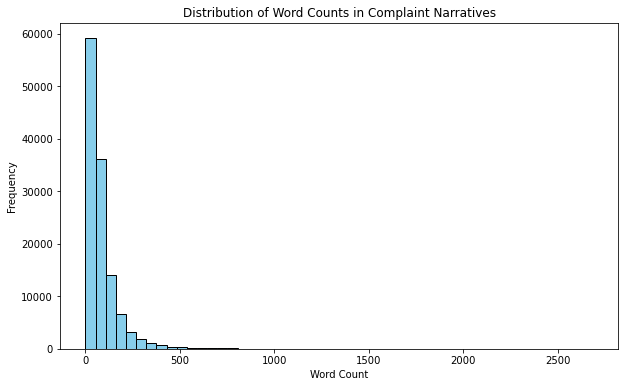

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and 'cleaned_narrative' is the preprocessed text column
# Step 1: Count words in each complaint
df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Step 2: Get summary statistics for word counts
word_count_summary = df['word_count'].describe()
print("Word Count Summary:\n", word_count_summary)

# Step 3: Visualize the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Complaint Narratives')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

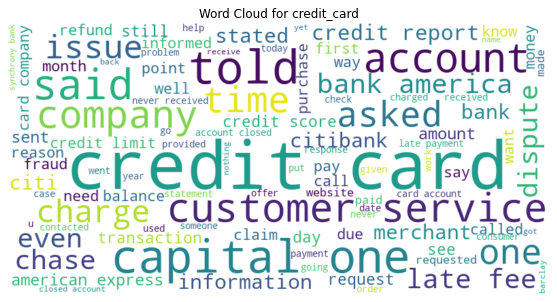

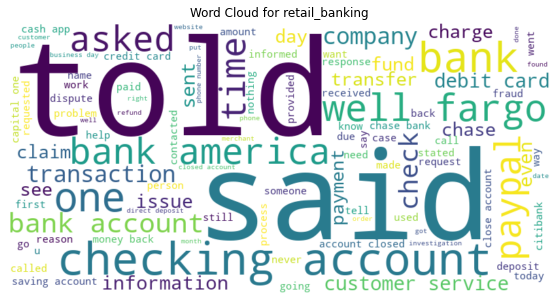

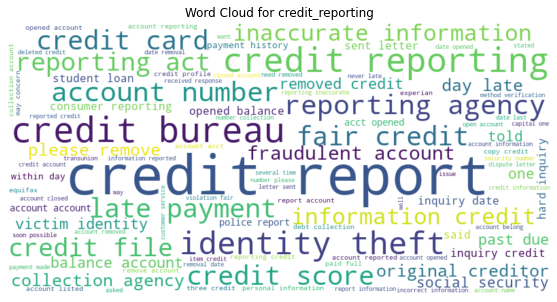

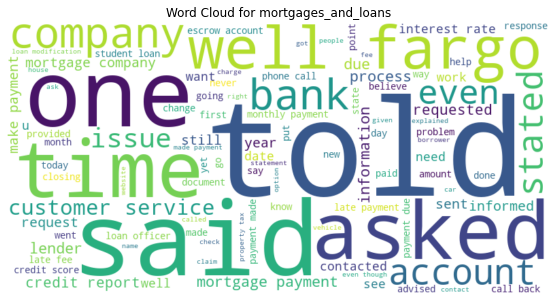

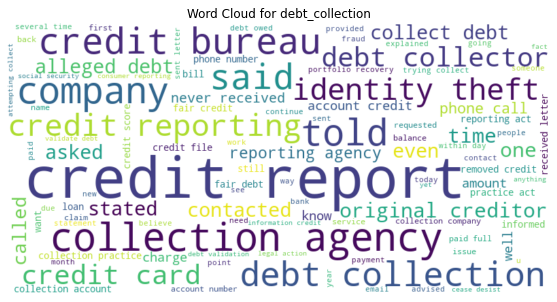

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each product label
def generate_word_cloud(data, product_label):
    text = ' '.join(data['cleaned_narrative'][data['product'] == product_label])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {product_label}')
    plt.axis('off')
    plt.show()

# Get unique product labels
product_labels = df['product'].unique()

# Generate and display word cloud for each product label
for label in product_labels:
    generate_word_cloud(df, label)


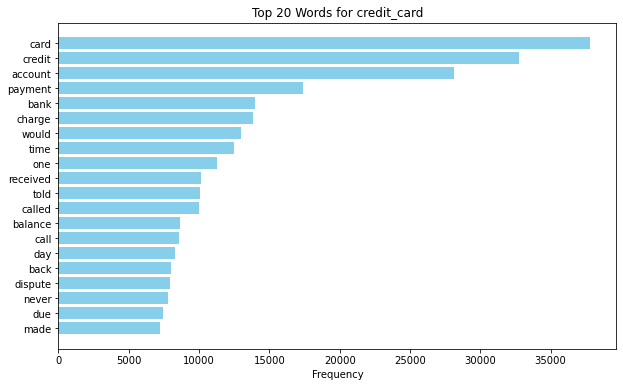

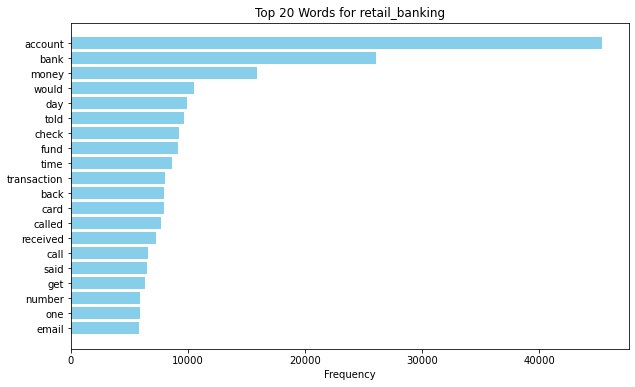

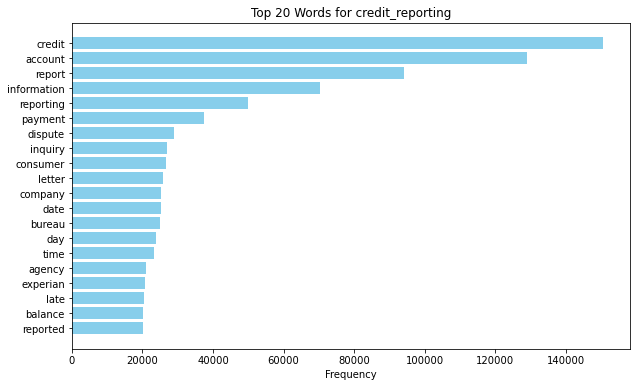

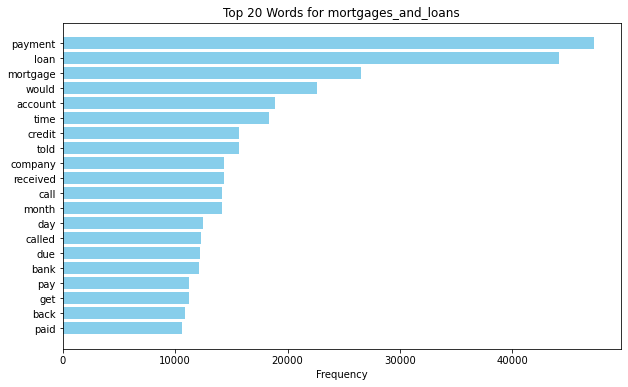

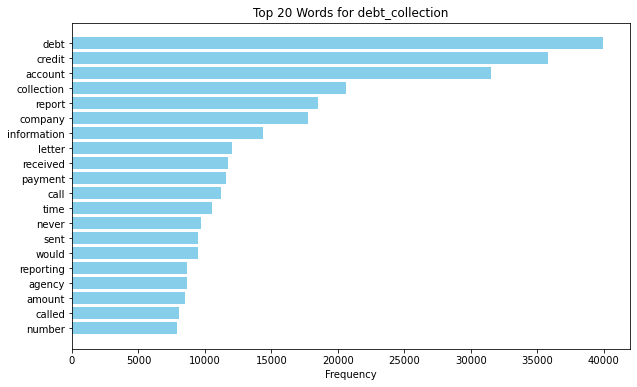

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to plot the top 20 words for each product label
def plot_top_words(data, product_label):
    # Filter data for the specific product label
    text = ' '.join(data['cleaned_narrative'][data['product'] == product_label])
    # Tokenize and count words
    word_counts = Counter(text.split())
    # Get the top 20 most common words
    top_words = word_counts.most_common(20)
    words, counts = zip(*top_words)
    
    # Plotting the top 20 words
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top 20 Words for {product_label}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Get unique product labels
product_labels = df['product'].unique()

# Generate and display the top 20 words for each product label
for label in product_labels:
    plot_top_words(df, label)

In [16]:
import pandas as pd

# Calculate text length if not already present
if 'text_length' not in df.columns:
    df['text_length'] = df['cleaned_narrative'].apply(len)

# Calculate word count if not already present
if 'number_of_words' not in df.columns:
    df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Adding text length column (character count for each narrative)
df['text_length'] = df['cleaned_narrative'].apply(len)

# Adding word count column (number of words in each narrative)
df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Display the relevant columns in the DataFrame
cleaned_df = df[['product', 'cleaned_narrative', 'text_length', 'number_of_words']]

# View the first few rows
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words
0,credit_card,purchase order day shipping amount receive pro...,1705,230
1,credit_card,forwarded message date tue subject please inve...,904,132
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173
3,credit_reporting,payment history missing credit report speciali...,903,131
4,credit_reporting,payment history missing credit report made mis...,851,123


In [23]:
from sklearn.preprocessing import LabelEncoder

# Ensure cleaned_df is a copy of the original DataFrame
cleaned_df = cleaned_df.copy()

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'product' column and assign it to the new 'target' column
cleaned_df['target'] = label_encoder.fit_transform(cleaned_df['product'])

# Display the first few rows to verify the target encoding
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words,target
0,credit_card,purchase order day shipping amount receive pro...,1705,230,0
1,credit_card,forwarded message date tue subject please inve...,904,132,0
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173,4
3,credit_reporting,payment history missing credit report speciali...,903,131,1
4,credit_reporting,payment history missing credit report made mis...,851,123,1


In [24]:
# Create a dictionary to map each product category to its numeric label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of product categories to numeric targets:")
for product, target in label_mapping.items():
    print(f"{product}: {target}")

Mapping of product categories to numeric targets:
credit_card: 0
credit_reporting: 1
debt_collection: 2
mortgages_and_loans: 3
retail_banking: 4


In [25]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target (y)
X = cleaned_df['cleaned_narrative']
y = cleaned_df['target']

# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting splits
print("Training set shapes (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shapes (X_test, y_test):", X_test.shape, y_test.shape)

Training set shapes (X_train, y_train): (99706,) (99706,)
Testing set shapes (X_test, y_test): (24927,) (24927,)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Step 1: Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Apply MinMax Scaling
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

# Print the shapes of the transformed features to verify
print("Scaled Training set shape:", X_train_scaled.shape)
print("Scaled Testing set shape:", X_test_scaled.shape)

Scaled Training set shape: (99706, 5000)
Scaled Testing set shape: (24927, 5000)
